In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
import cv2
import urllib

import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
from darkflow.defaults import argHandler
from darkflow.net.build import TFNet

In [3]:
FLAGS = argHandler()
FLAGS.setDefaults()

In [4]:
FLAGS['model'] = 'cfg/yolo.cfg'
FLAGS['load'] = 'bin/yolo.weights'

In [5]:
tfnet = TFNet(FLAGS)

Parsing ./cfg/yolo.cfg
Parsing cfg/yolo.cfg
Loading bin/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.0263359546661s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | 

In [6]:
darknet = tfnet.darknet

In [7]:
def download_img(url):
    resp = urllib.urlopen(url)
    img = np.asarray(bytearray(resp.read()), dtype="uint8")
    img = cv2.imdecode(img, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def predict(img):
    img = np.asarray(img)
    pred = tfnet.return_predict(img)
    return pred

def draw_predict(img, pred):
    fontFace  = cv2.FONT_HERSHEY_SIMPLEX
    fontScale = 0.5
    fontColor = (255,255,255)
    thickness = 1
    
    for p in pred:
        label = p['label']
        confidence = p['confidence']
        tl = np.array((p['topleft']['x'], p['topleft']['y']))
        br = np.array((p['bottomright']['x'], p['bottomright']['y']))
        
        size, baseline = cv2.getTextSize(label, fontFace, fontScale, thickness)
        size = np.array(size)
        text_tl = tl - np.array((0, size[1])) - np.array((0, baseline))
        text_br = tl + np.array((size[0], 0))
        text_or = tl - np.array((0, size[1])) + np.array((0, baseline))
        
        if (confidence > 0.1):
            cv2.rectangle(img, tuple(text_tl), tuple(text_br), (255, 0, 0), cv2.FILLED)
            cv2.rectangle(img, tuple(tl), tuple(br), (255, 0, 0), thickness)
            cv2.putText(img, label, tuple(text_or), fontFace, fontScale, fontColor, thickness)
    plt.figure(figsize=(15,15))
    plt.imshow(img)
            
def magic(url):
    img = download_img(url)
    pred = predict(img)
    draw_predict(img, pred)

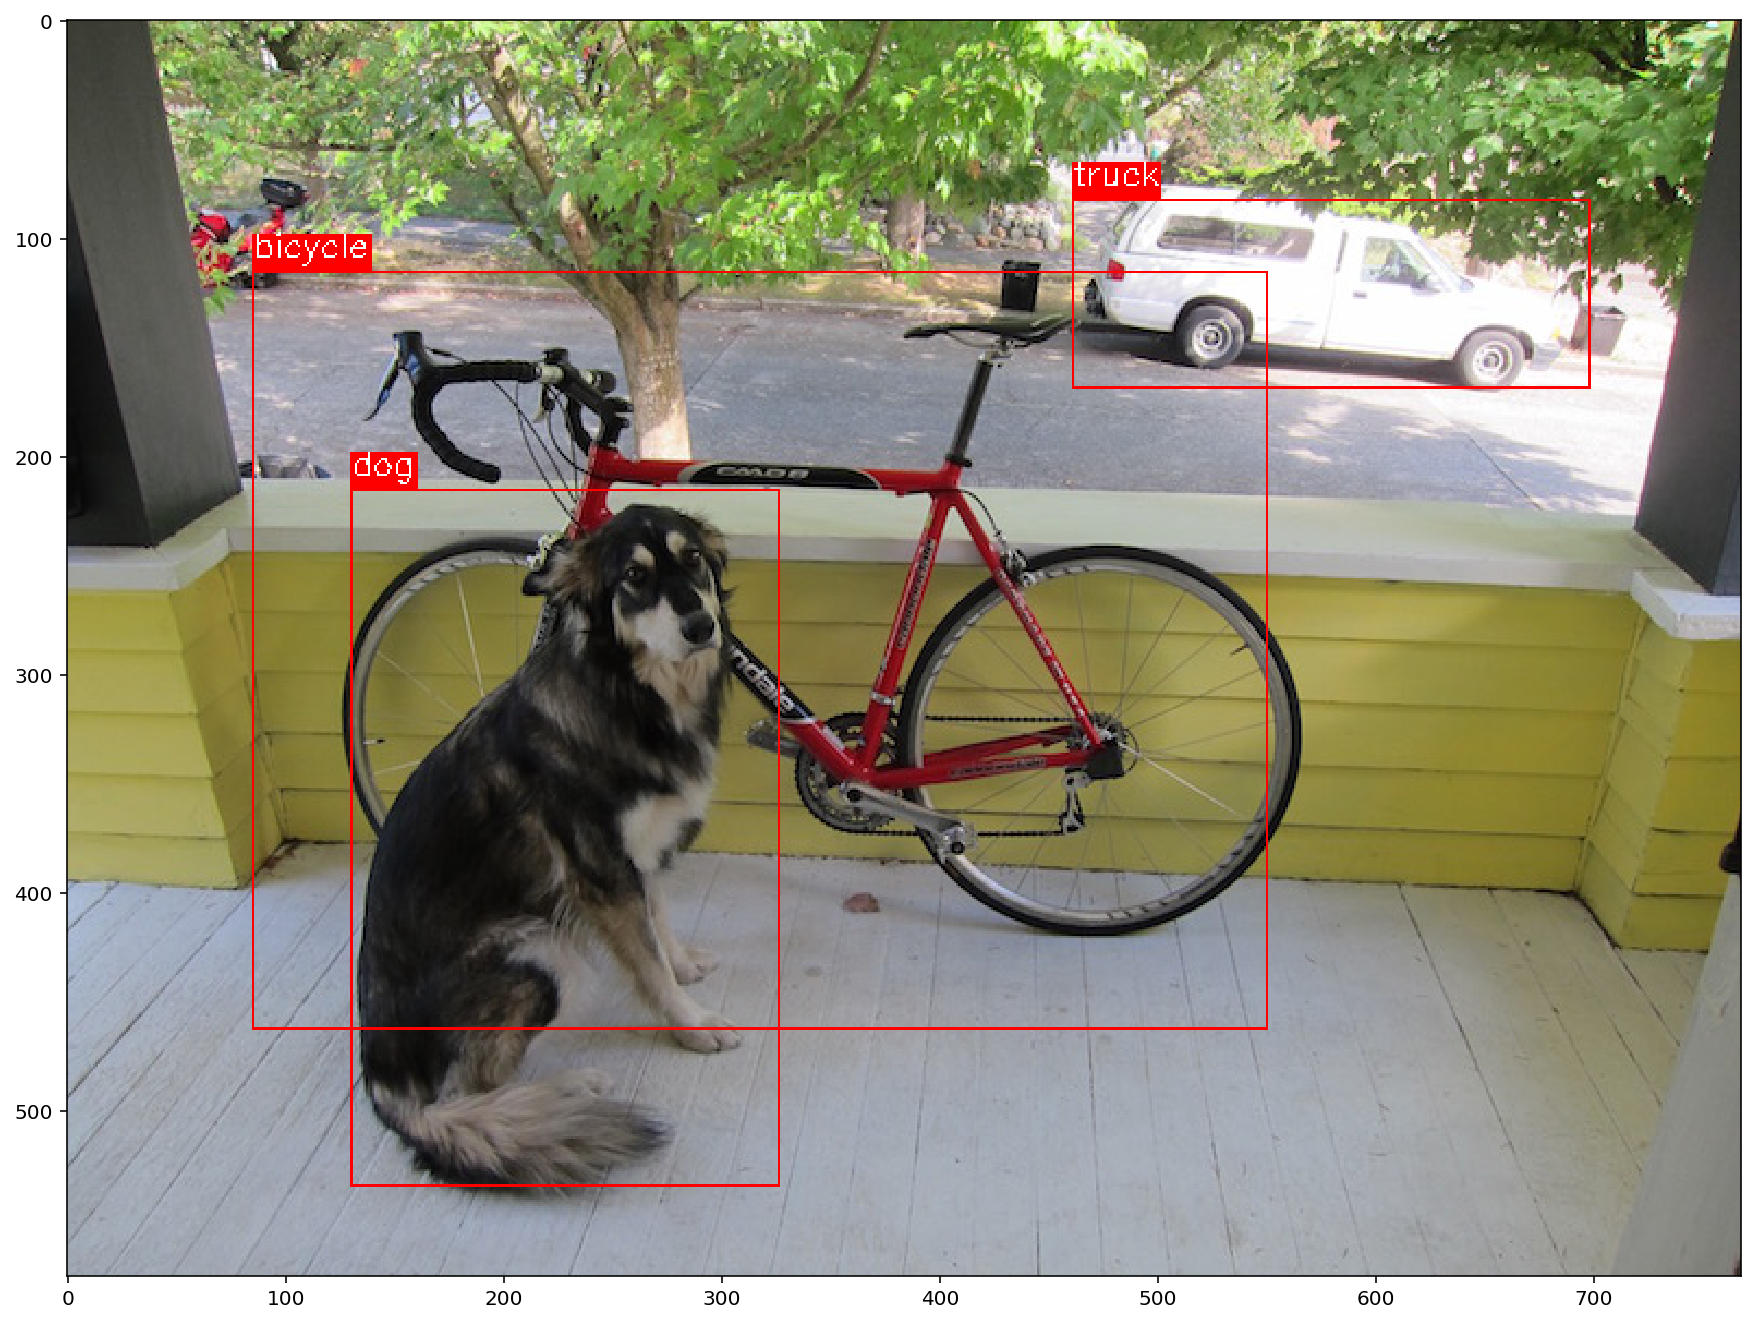

In [8]:
magic('https://github.com/pjreddie/darknet/raw/master/data/dog.jpg')